In [1]:
import pandas as pd 

df=pd.read_csv("student_performance_dataset.csv")

print("Smaple Rows")
print(df.head())

print(f"Rows:{df.shape[0]},Columns:{df.shape[1]}")

print("DataSet Info \n")
print(df.info())

print("Summary Statistics\n")
print(df.describe(include="all"))

print("Missing Values\n")
print(df.isnull().sum())






Smaple Rows
  Student_ID  Gender  StudyHours  Attendance  PastScores  \
0       S147    Male          31   68.267841          86   
1       S136    Male          16   78.222927          73   
2       S209  Female          21   87.525096          74   
3       S458  Female          27   92.076483          99   
4       S078  Female          37   98.655517          63   

  Parental_Education_Level Internet Extracurricular_Activities  \
0              High School      Yes                        Yes   
1                      PhD       No                         No   
2                      PhD      Yes                         No   
3                Bachelors       No                         No   
4                  Masters       No                        Yes   

   Final_Exam_Score Passed  
0                63   Pass  
1                50   Fail  
2                55   Fail  
3                65   Pass  
4                70   Pass  
Rows:708,Columns:10
DataSet Info 

<class 'pandas.core.f

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("student_performance_dataset.csv")

print("Missing Values in Each Column")

print(df.isnull().sum())

le=LabelEncoder()
df["Internet"]=le.fit_transform(df["Internet"])# yes-1,no-0
df["Passed"]=le.fit_transform(df["Passed"])# yes-1,no-0

print("Afer Decoding")
print(df.head())

print("Datatypes:")
print(df.dtypes)





Missing Values in Each Column
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
Afer Decoding
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         0           5       0
1           5          80         60         1           6       1
2           5          90         75         0           8       1
3           3          70         50         1           5       0
4           7          85         90         0           6       1
Datatypes:
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        71
           1       0.81      0.80      0.81        71

    accuracy                           0.81       142
   macro avg       0.81      0.81      0.81       142
weighted avg       0.81      0.81      0.81       142



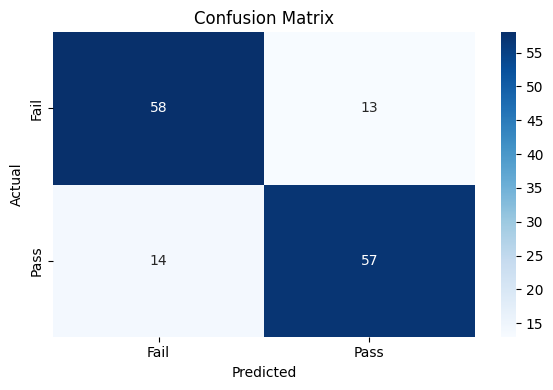

-------Predict Your Result-----
Prediction Based on Input:Pass


C:\Users\AADITYA PORWAL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("student_performance_dataset.csv")


le=LabelEncoder()
df["Internet"]=le.fit_transform(df["Internet"])# yes-1,no-0
df["Passed"]=le.fit_transform(df["Passed"])# yes-1,no-0

features=['StudyHours','Attendance','PastScore']
scaler=StandardScaler()
df_scaled=df.copy()
df_scaled[features]=scaler.fit_transform(df[features])

X=df_scaled[features]
y=df_scaled['Passed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,y_pred))

conf_matrix=confusion_matrix(y_test,y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",
            xticklabels=["Fail",'Pass'],yticklabels=["Fail",'Pass'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("-------Predict Your Result-----")
try:
    study_hours=float(input("Enter Study Hours:"))
    attendance=float(input("Enter Attendance :"))
    past_scores=float(input("Enter past Scores:"))

    user_input_df=pd.DataFrame([{
        'StudyHours':study_hours,
        'Attendance':attendance,
        'PastScore':past_scores
    }])

    user_input_scaled=scaler.transform(user_input_df)
    prediction=model.predict(user_input_scaled)[0]

    result ="Pass" if prediction==1 else "Fail"
    print(f"Prediction Based on Input:{result}")

except Exception as e:
    print(" AN ERROR OCCURED")



    








